<a href="https://colab.research.google.com/github/batra-ayush/PyTorch-Examples/blob/main/Iris_with_Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)

labels[iris.species=='versicolor'] =1
labels[iris.species=='virginica'] = 2
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,test_size=0.2)

len(data)

150

In [5]:
train_data = TensorDataset(torch.Tensor(train_data),torch.Tensor(train_labels))
test_data = TensorDataset(torch.Tensor(test_data),torch.Tensor(test_labels))

In [6]:
train_loader = DataLoader(train_data,batch_size=4,shuffle=True)
test_loader  = DataLoader(test_data)

In [7]:
class theClassforIris(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(4,64)
    self.layer = nn.Linear(64,64)
    self.output = nn.Linear(64,3)

  def forward(self,x):
    x = self.input(x)
    x = F.relu(x)
    x = self.layer(x)
    x  = F.relu(x)
    x = self.output(x)
    return x

In [8]:
AnnIris= theClassforIris()
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(AnnIris.parameters(),lr=0.01)

In [9]:
numepochs = 1000
trainAcc = []
for epochi in range(numepochs):
  batchacc = []
  for x,y in train_loader:
    yHat = AnnIris(x)
    loss = lossfun(yHat,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    batch_acc = 100*torch.mean((torch.argmax(yHat,axis=1) == y).float())
    batchacc.append(batch_acc.item())
  trainAcc.append(np.mean(batchacc))


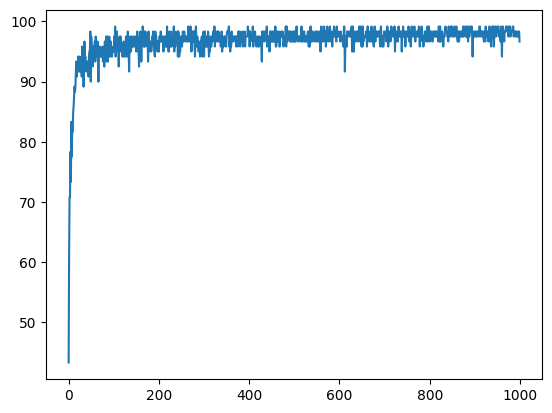

In [10]:
plt.plot(trainAcc)

In [12]:
np.mean(trainAcc)

96.7725

In [19]:
testAcc = []
for X,y in test_loader:
  ypred = AnnIris(X)
  testAcc.append((100*torch.mean((torch.argmax(ypred,axis=1) == y).float())).item())



In [22]:
testAcc

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 0.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

In [ ]:
accpct = 100*(torch.mean(accuracy.float()))
accpct